# Lab 2.0: Hypothesis Testing

Question: Consider the peak flow time series for Skykomish River. Postulating a change in flood statistics around 1975, test for statistical significance of the observed change in the mean annual flood. 

Use a two-sample test, with alpha=0.05 (i.e. 95% confidence) and the z-distribution to define the rejection region (why is this appropriate?).

## Import and Sort Data
First, import modules for the whole lab and create useable arrays of data.

In [3]:
# Import all modules for the lab

# To load data
import pandas as pd

# To plot
import matplotlib.pyplot as plt
import numpy as np

import math
import scipy.stats as st
import statistics as stats
from scipy.interpolate import interp1d

In [8]:
# Define the location of the .xlsx file.
Skykomish_data_file = '../Lab1.1/Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'

# Use pandas.read_excel() function to open this file.
Skykomish_data = pd.read_excel(Skykomish_data_file)

# Now we can see the dataset we loaded:
Skykomish_data

,date of peak,water year,peak value (cfs),gage_ht (feet)
0,1928-10-09,1929,18800,10.55
1,1930-02-05,1930,15800,10.44
2,1931-01-28,1931,35100,14.08
3,1932-02-26,1932,83300,20.70
4,1932-11-13,1933,72500,19.50
...,...,...,...,...
76,2005-01-18,2005,74600,19.55
77,2005-12-24,2006,33800,14.27
78,2006-11-06,2007,129000,24.51
79,2007-12-03,2008,51100,16.79


In [14]:
# Divide the data into the early period (before 1975) and late period
# (after and including 1975). 
Skykomish_early = Skykomish_data[ Skykomish_data['water year'] < 1975 ] 
Skykomish_late = Skykomish_data[ Skykomish_data['water year'] >= 1975 ] 

## Find Distribution
Next, what kind of distribution does the data have?

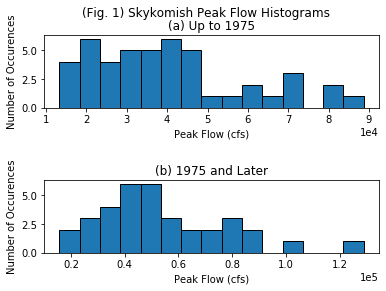

In [16]:
# Make a histogram for each period

nbins = 15

# Create a figure with subplots
fig1, axs = plt.subplots(2, 1)
fig1.subplots_adjust(hspace=1)
fig1.suptitle('(Fig. 1) Skykomish Peak Flow Histograms')

axs[0].hist(Skykomish_early['peak value (cfs)'], nbins, ec="black")
axs[0].set_title('(a) Up to 1975')
axs[0].set_xlabel('Peak Flow (cfs)')
axs[0].set_ylabel('Number of Occurences')
axs[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

axs[1].hist(Skykomish_late['peak value (cfs)'], nbins, ec="black")
axs[1].set_title('(b) 1975 and Later')
axs[1].set_xlabel('Peak Flow (cfs)')
axs[1].set_ylabel('Number of Occurences')
axs[1].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

Check which distribution might fit the data best by comparing this distribution of data to data you made up with a specified distribution.

* Try plotting theoretical cdfs with the distributions
you’re considering.

* Then, try generating a set of numbers from a
uniform distribution and a lognormal distribution
with the same mean and standard deviation as
the data (based on the histograms, the data does not look normal).

* Create quantile plots of your generated numbers
to see how well they compare to your data and
your theoretical cdfs.

In [21]:
# Calculate CDF of the early data

# The function takes an array of data as an argument and returns an array of 
# evenly spaced intervals for the range of the data, the mean, and standard 
# deviation.
def make_cdf(data):
    
    mean = stats.mean(data)
    sd = stats.stdev(data)
    r = int(np.max(data)-np.min(data))
    
    return np.linspace(np.min(data), np.max(data), r), mean, sd

# run this function on the early period of peak flow values
range_early, mean_early, sd_early = make_cdf(Skykomish_early['peak value (cfs)'])

In [103]:
# Calculate quantiles of the early data

# The function takes an array of data as an argument and returns the data
# as an ordered array and the plotting position associated with each data point.
def quantile_fn(data):

    ordered_data = np.sort(data)
    n = len(ordered_data)

    rank = []
    plotting_position = []
    for i in range(n):
        rank.append(i+1)
        # Using the Cunnane plotting position.
        plotting_position.append((rank[i]-.4)/(n+.2))
        
    return ordered_data, plotting_position


# run this function on the early period of peak flow values
ordered_early, plotting_early = quantile_fn(Skykomish_early['peak value (cfs)'])

### Uniform Distribution

In [104]:
# Try a uniform distribution for the early period

size = len(Skykomish_early['peak value (cfs)'])

# Calculate the range of data
r = math.sqrt(12*sd_early**2)

a = mean_early - r/2
b = mean_early + r/2

early_uniform = np.random.uniform(a, b, size)

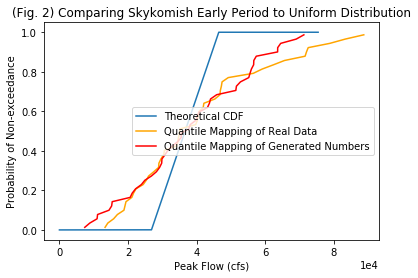

In [105]:
# Plot and compare the theoretical CDF, quantile plot of data, and quantile plot
# of generated uniform data

ordered_uniform, plotting_uniform = quantile_fn(early_uniform)

plt.figure(2)

plt.plot(st.uniform.cdf(range_early, mean_early, sd_early), label='Theoretical CDF')
plt.plot(ordered_early, plotting_early, color='orange', label='Quantile Mapping of Real Data')
plt.plot(ordered_uniform, plotting_uniform, color='red', label='Quantile Mapping of Generated Numbers')

plt.title('(Fig. 2) Comparing Skykomish Early Period to Uniform Distribution')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Probability of Non-exceedance')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc="best")

### Lognormal Distribution

In [106]:
# Try lognormal distribution for the early period

mu_early = math.log(mean_early**2 / math.sqrt(mean_early**2 + sd_early**2))
sigma_early = math.sqrt(math.log((mean_early**2 + sd_early**2) / (mean_early**2)))

early_lognormal = np.random.lognormal(mu_early, sigma_early, size)

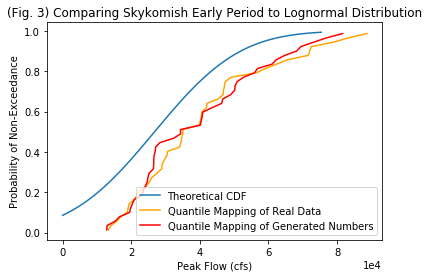

In [107]:
# Plot and compare the theoretical CDF, quantile plot of data, and quantile plot
# of generated lognormal data

ordered_lognormal, plotting_lognormal = quantile_fn(early_lognormal)

plt.figure(3)

plt.plot(st.norm.cdf(range_early, mean_early, sd_early), label='Theoretical CDF')
plt.plot(ordered_early, plotting_early, color='orange', label='Quantile Mapping of Real Data')
plt.plot(ordered_lognormal, plotting_lognormal, color='red', label='Quantile Mapping of Generated Numbers')

plt.title('(Fig. 3) Comparing Skykomish Early Period to Lognormal Distribution')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Probability of Non-Exceedance')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc="best")

## Z-Distribution

In [33]:
# Calculate the z-test, p-value

n = len(Skykomish_early['peak value (cfs)'])
m = len(Skykomish_late['peak value (cfs)'])

conf = 0.95

delta_0 = 0

z_alpha = st.norm.ppf(conf)

mean1 = stats.mean(Skykomish_early['peak value (cfs)'])
mean2 = stats.mean(Skykomish_late['peak value (cfs)'])

sd1 = stats.stdev(Skykomish_early['peak value (cfs)'])
sd2 = stats.stdev(Skykomish_late['peak value (cfs)'])

pooled_sd = math.sqrt(sd1**2/m + sd2**2/n)

ztest = (mean2 - mean1 - delta_0)/pooled_sd

p = 1 - st.norm.cdf(ztest)

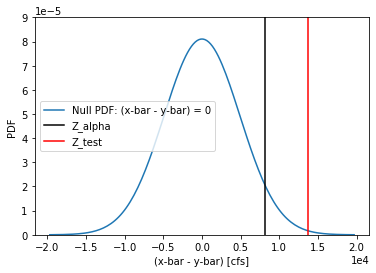

In [34]:
# Plot the results

plt.figure()

x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]

plt.plot(x, st.norm.pdf(x, 0, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0')
plt.axvline(z_alpha*pooled_sd, color='black', label='Z_alpha')
plt.axvline(ztest*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cfs]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 9e-5)
plt.legend(loc='best')

In [44]:
# Calculate CDF from entire record

x_ordered, x_plotting = quantile_fn(Skykomish_data['peak value (cfs)'])
x_CDF = [1 - i for i in x_plotting]

x_ordered.reverse()

# Extrapolate the ends
xsort_first = x_ordered[0] + (x_ordered[0]-x_ordered[1]) * (1-x_CDF[0])/(x_CDF[0]-x_CDF[1])
xsort_last = x_ordered[len(x_ordered)-1] - (x_ordered[len(x_ordered)-1] - x_ordered[len(x_ordered)-2]) * x_CDF[len(x_CDF)-1]/(x_CDF[len(x_CDF)-1]- x_CDF[len(x_CDF)-2])
xsort = [xsort_first]
xsort.extend(x_ordered)
xsort.append(xsort_last)

x_CDF.insert(0, 1)
x_CDF.append(0)

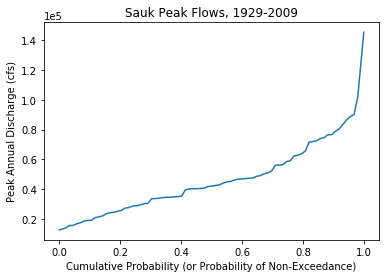

In [45]:
# Plot

plt.figure()
plt.plot(x_CDF, xsort)
plt.ylabel('Peak Annual Discharge (cfs)')
plt.xlabel('Cumulative Probability (or Probability of Non-Exceedance)')
plt.title('Sauk Peak Flows, 1929-2009')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

How would the estimate of p change if the null hypothesis is that the difference in the means is equal to 20% of the mean of the early period?

In [ ]:
# Calculate the z-test, p-value

delta = .2 * mean1

z_alpha_2 = st.norm.ppf(conf, delta, pooled_sd)

p_2 = 1 - st.norm.cdf(ztest_2)

print(z_alpha_2, ztest_2)

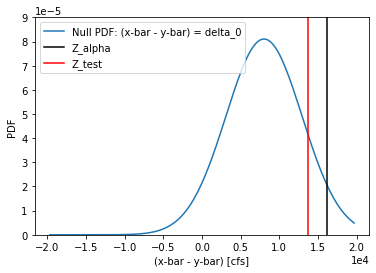

In [110]:
# Plot the results

plt.figure()

plt.plot(x, st.norm.pdf(x, delta, pooled_sd), label='Null PDF: (x-bar - y-bar) = delta_0')
plt.axvline(z_alpha_2, color='black', label='Z_alpha')
plt.axvline(ztest*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cfs]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 9e-5)
plt.legend(loc='best')

## Distribution of the Means

In [665]:
# Generate 20 sets of 100 random numbers

q = np.random.random_sample((100, 20))

q = q.tolist()

# Map to early period
f = interp1d(x_CDF, xsort)

Q = []
Q.extend(f(q))
    
Q_mean = np.mean(Q, axis=1)
Q_sd = np.std(Q, axis=1)

Q_mean = Q_mean.tolist()
Q_sd = Q_sd.tolist()

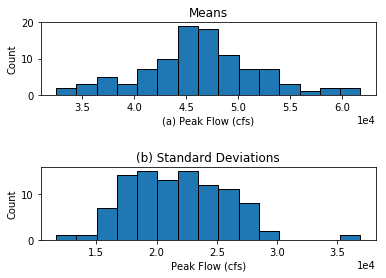

In [666]:
# Plot histograms

fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=1)

axs[0].hist(Q_mean, nbins, ec="black")
axs[0].set_title('Means')
axs[0].set_xlabel('(a) Peak Flow (cfs)')
axs[0].set_ylabel('Count')
axs[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

axs[1].hist(Q_sd, nbins, ec="black")
axs[1].set_title('(b) Standard Deviations')
axs[1].set_xlabel('Peak Flow (cfs)')
axs[1].set_ylabel('Count')
axs[1].ticklabel_format(axis='x', style='sci', scilimits=(0,0))